In [234]:
# importing libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns
import pickle

# Data exploration and preparation

In [140]:
# reading menu csv file
menu = pd.read_csv("XTern 2024 Artificial Intelegence Data Set - Menu.csv")
menu.rename(columns={"Unnamed: 0": "Item_Category"}, inplace=True)
menu.head()

,Item_Category,Item,Price,Calories
0,0,Hoosier BBQ Pulled Pork Sandwich,8,400
1,1,Cornbread Hush Puppies,5,250
2,2,Breaded Pork Tenderloin Sandwich,9,550
3,3,Indiana Pork Chili,7,300
4,4,Fried Catfish Basket,10,600


In [141]:
# dictionary to transform orders in data into numerical variables
order_to_category_dict = {menu.Item[i]: menu.Item_Category[i] for i in range(len(menu.Item))}
order_to_category_dict

{'Hoosier BBQ Pulled Pork Sandwich': 0,
 'Cornbread Hush Puppies': 1,
 'Breaded Pork Tenderloin Sandwich': 2,
 'Indiana Pork Chili': 3,
 'Fried Catfish Basket': 4,
 'Ultimate Grilled Cheese Sandwich (with bacon and tomato)': 5,
 'Sweet Potato Fries': 6,
 'Indiana Corn on the Cob (brushed with garlic butter)': 7,
 'Indiana Buffalo Chicken Tacos (3 tacos)': 8,
 'Sugar Cream Pie': 9}

In [142]:
# reading data csv file
data = pd.read_csv("XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")
data.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [143]:
def sort_series_by_name(my_series):
    """
    Function to sort a pandas series into a dictionary to allow for plotting
    """
    myDict = dict(my_series)
    myKeys = list(myDict.keys())
    myKeys.sort()
    sorted_dict = {i: myDict[i] for i in myKeys}
    return sorted_dict

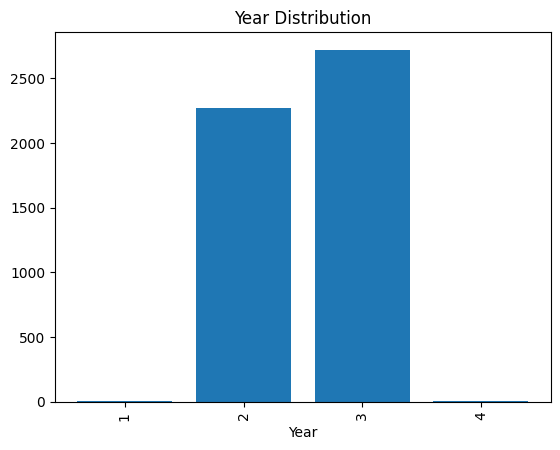

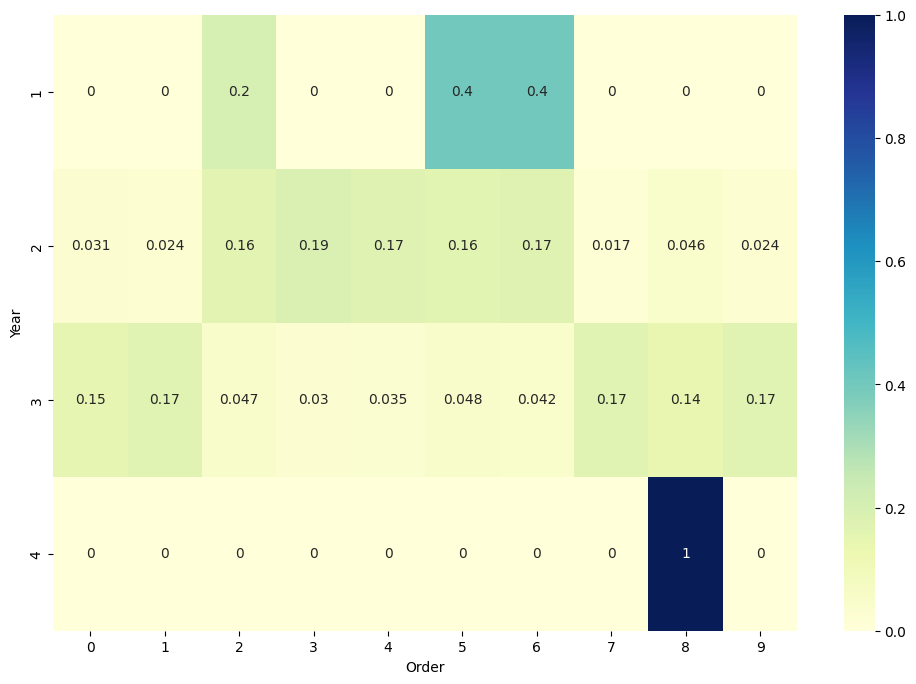

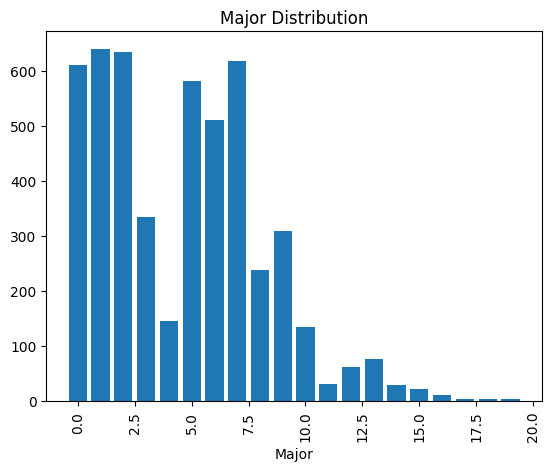

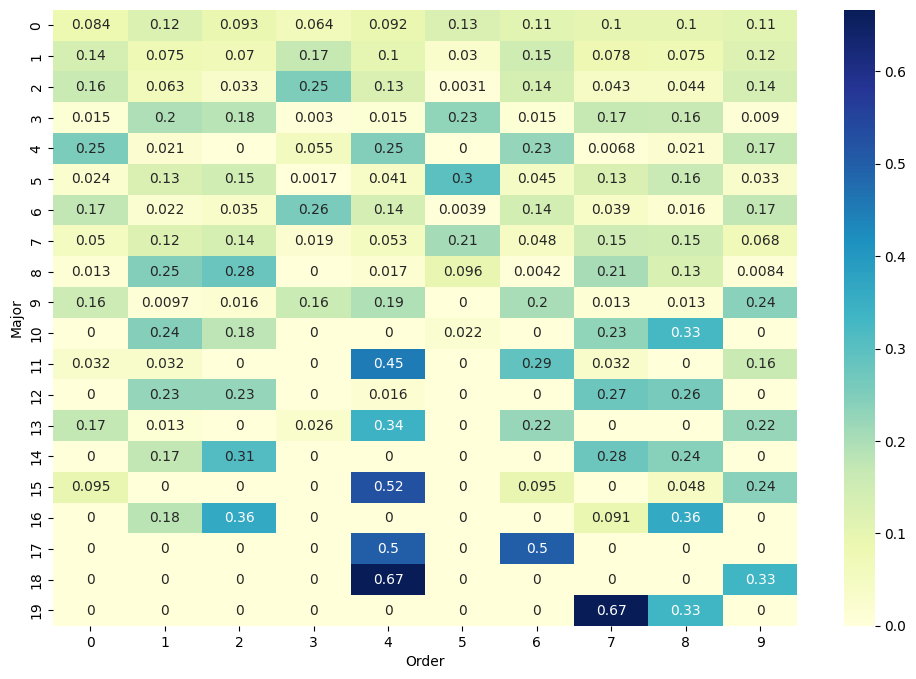

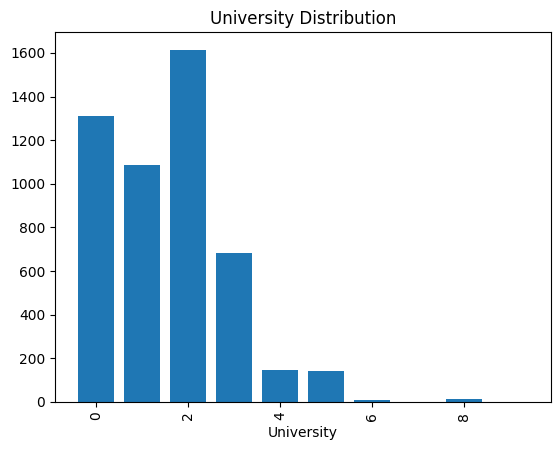

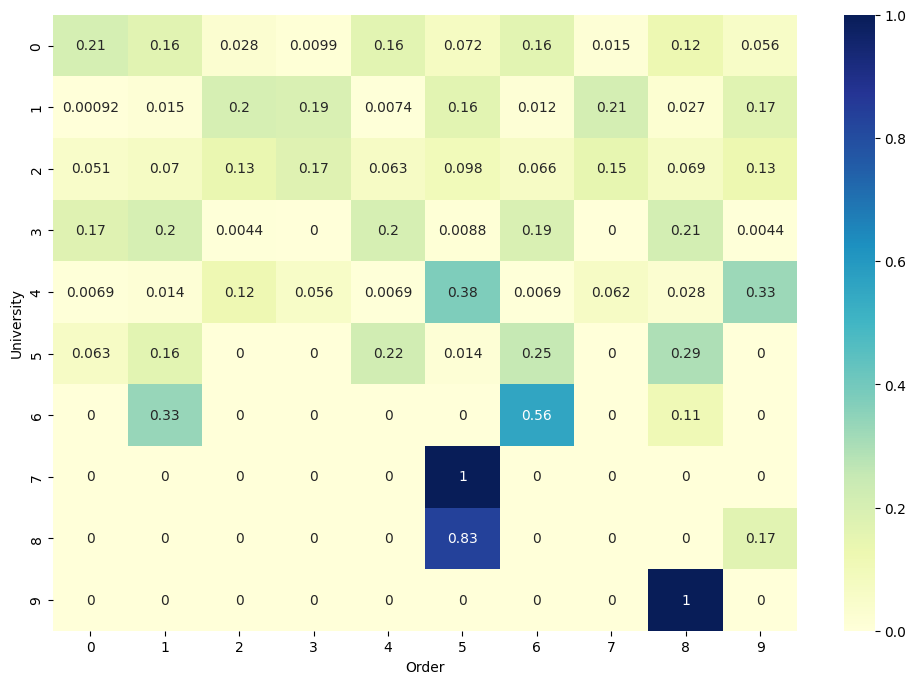

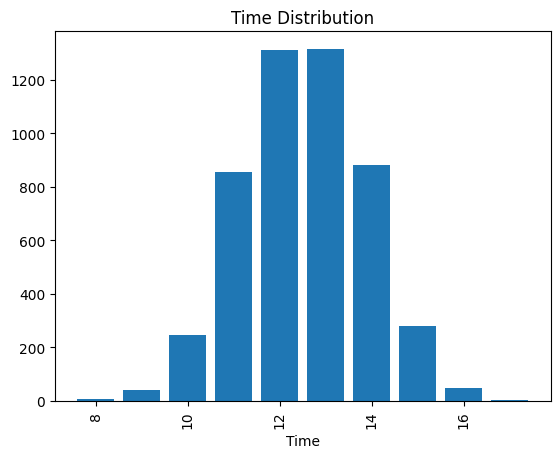

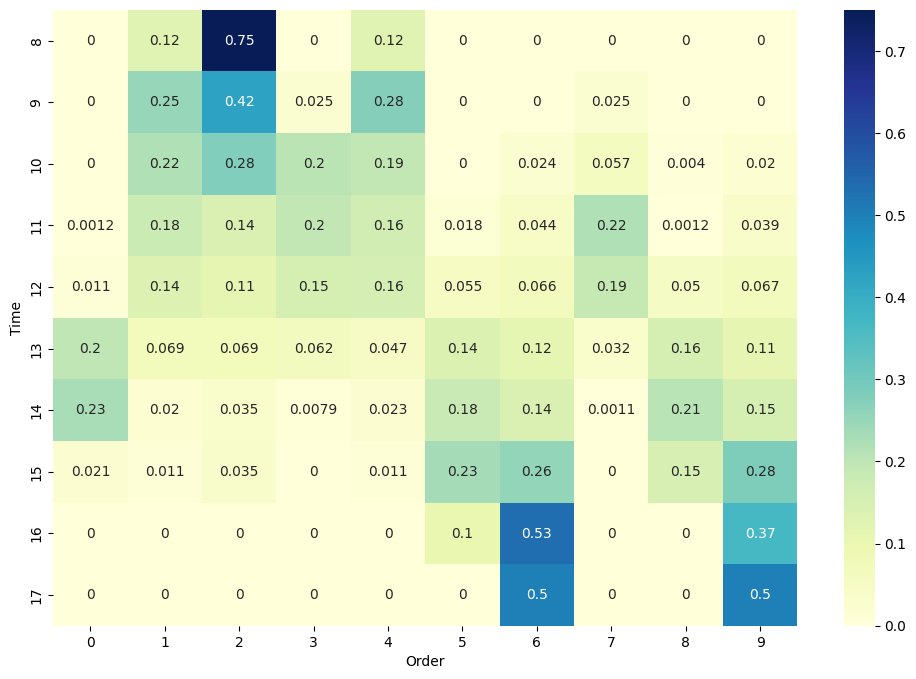

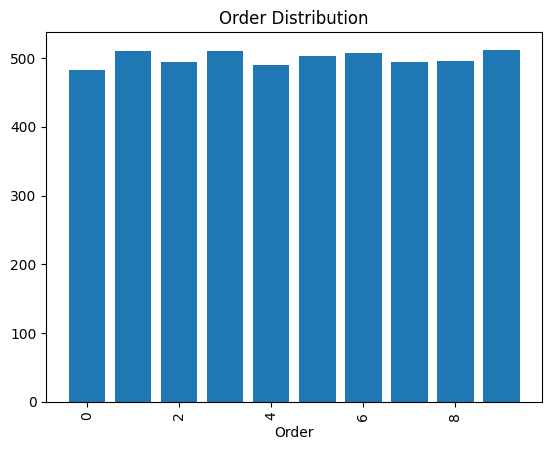

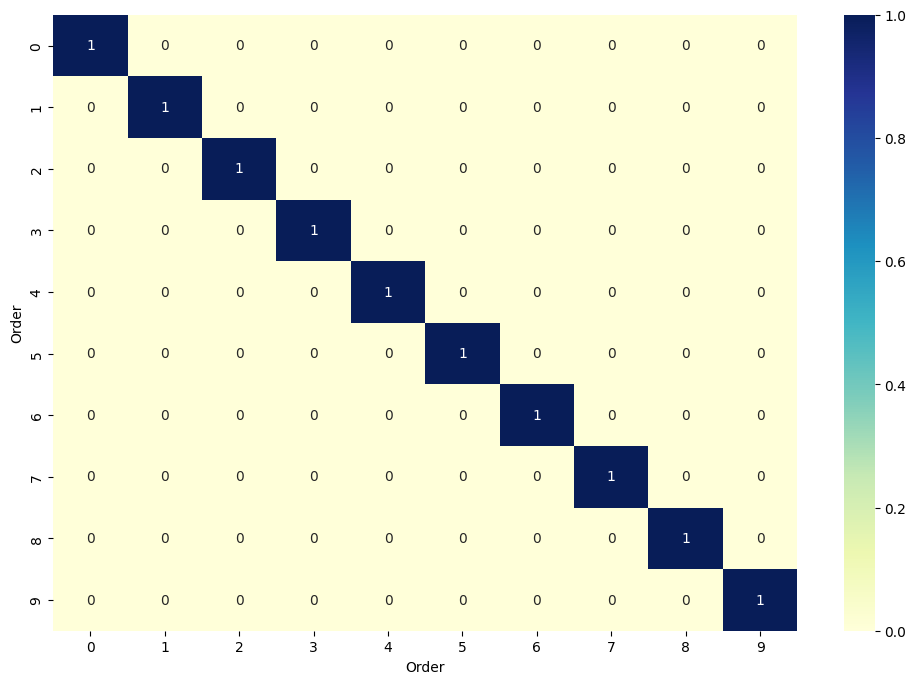

In [167]:
# making graphs and charts for data visualization
for col in data.columns:
    plt.bar(*zip(*sort_series_by_name(data[col].value_counts()).items()))
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.title(col + ' Distribution')
    plt.show()
    
    contingency_pct = pd.crosstab(data[col], data.Order, normalize='index')
    plt.figure(figsize=(12,8))
    sns.heatmap(contingency_pct, annot=True, cmap="YlGnBu")
    plt.show()

In [145]:
# replacing text features with numerical features
data.replace({"Order": order_to_category_dict}, inplace=True)

In [146]:
# numerical representation of Order distribution
data.Order.value_counts()

Order
9    512
3    510
1    510
6    508
5    503
8    496
7    495
2    494
4    490
0    482
Name: count, dtype: int64

In [147]:
# numerical representation of Year distribution
data['Year'] = data['Year'].str.slice(5)
data.Year.value_counts()

Year
3    2719
2    2273
1       5
4       3
Name: count, dtype: int64

In [157]:
# converting major into numerical values, then printing distribution
major_to_category_dict = dict()
for i in range(len(data.Major.unique())):
    major_to_category_dict[data.Major.unique()[i]] = i
data.replace({"Major": major_to_category_dict}, inplace=True)
data.Major.value_counts()

Major
1     640
2     635
7     619
0     610
5     582
6     511
3     334
9     309
8     239
4     146
10    135
13     76
12     62
11     31
14     29
15     21
16     11
17      4
18      3
19      3
Name: count, dtype: int64

In [149]:
# printing (unordered) distibution of orders made at each time
data.Time.value_counts()

Time
13    1316
12    1314
14     883
11     857
15     282
10     247
16      49
9       40
8        8
17       4
Name: count, dtype: int64

In [150]:
# printing distribution of students who attended each university in the dataset
# converts text features to numerical
uni_to_category_dict = dict()
for i in range(len(data.University.unique())):
    uni_to_category_dict[data.University.unique()[i]] = i
data.replace({"University": uni_to_category_dict}, inplace=True)
data.University.value_counts()

University
2    1614
0    1309
1    1085
3     682
4     144
5     143
8      12
6       9
7       1
9       1
Name: count, dtype: int64

# Starting modeling and model selection

In [152]:
X = data[['Year', 'Major', 'University', 'Time']]
y = data['Order']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

## Comparing accuracies of different types of base-models for model selection

In [236]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rfc_accuracy_score = accuracy_score(y_pred, y_test)

In [237]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
dtc_accuracy_score = accuracy_score(y_pred, y_test)

In [238]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
knc_accuracy_score = accuracy_score(y_pred, y_test)

In [239]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc_accuracy_score = accuracy_score(y_pred, y_test)

([0, 1, 2, 3],
 [Text(0, 0, 'Random Forest Classifier'),
  Text(1, 0, 'Decision Tree Classifier'),
  Text(2, 0, 'K-Neighbors Classifier'),
  Text(3, 0, 'Support Vector Classifier')])

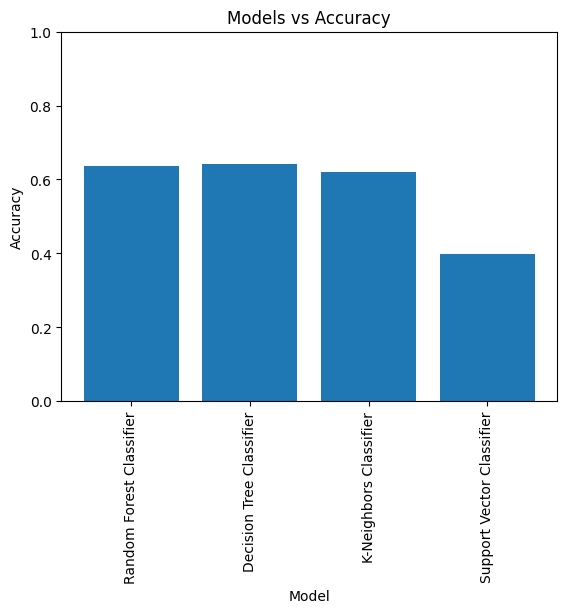

In [253]:
plt.bar(['Random Forest Classifier', 'Decision Tree Classifier',
        'K-Neighbors Classifier', 'Support Vector Classifier'],
       [rfc_accuracy_score, dtc_accuracy_score, knc_accuracy_score, 
        svc_accuracy_score])
plt.gca().set_ylim([0, 1])
plt.title('Models vs Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=90)

[Text(0.4709668628094524, 0.96875, 'Time <= 12.5\ngini = 0.9\nsamples = 4000\nvalue = [374, 416, 393, 397, 385, 409, 411, 398, 403, 414]'),
 Text(0.22499472524381095, 0.90625, 'Year <= 2.5\ngini = 0.855\nsamples = 1962\nvalue = [13, 327, 284, 331, 317, 73, 104, 364, 50, 99]'),
 Text(0.09641082145536384, 0.84375, 'University <= 0.5\ngini = 0.78\nsamples = 921\nvalue = [2, 40, 212, 270, 247, 46, 53, 27, 1, 23]'),
 Text(0.03319579894973743, 0.78125, 'Major <= 9.5\ngini = 0.593\nsamples = 180\nvalue = [0, 9, 15, 7, 111, 10, 19, 1, 0, 8]'),
 Text(0.02288072018004501, 0.71875, 'Major <= 6.5\ngini = 0.525\nsamples = 165\nvalue = [0, 5, 5, 7, 111, 10, 19, 0, 0, 8]'),
 Text(0.01350337584396099, 0.65625, 'Time <= 11.5\ngini = 0.425\nsamples = 130\nvalue = [0, 1, 3, 6, 97, 5, 15, 0, 0, 3]'),
 Text(0.010502625656414103, 0.59375, 'Major <= 5.5\ngini = 0.271\nsamples = 47\nvalue = [0, 1, 2, 0, 40, 1, 2, 0, 0, 1]'),
 Text(0.00900225056264066, 0.53125, 'Major <= 4.5\ngini = 0.369\nsamples = 33\nvalue 

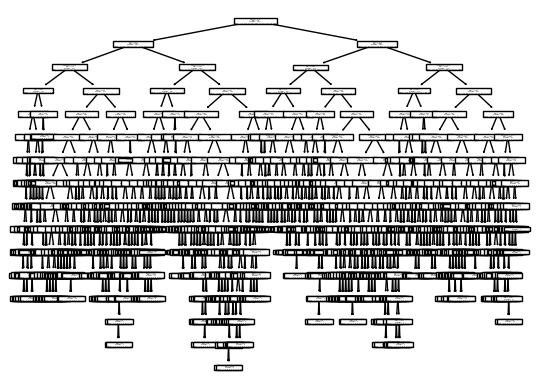

In [225]:
sklearn.tree.plot_tree(dtc, feature_names=list(X.columns))

In [227]:
print(sklearn.tree.export_text(dtc, feature_names=list(X.columns)))

|--- Time <= 12.50
|   |--- Year <= 2.50
|   |   |--- University <= 0.50
|   |   |   |--- Major <= 9.50
|   |   |   |   |--- Major <= 6.50
|   |   |   |   |   |--- Time <= 11.50
|   |   |   |   |   |   |--- Major <= 5.50
|   |   |   |   |   |   |   |--- Major <= 4.50
|   |   |   |   |   |   |   |   |--- Major <= 2.50
|   |   |   |   |   |   |   |   |   |--- Major <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- Major <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |   |   |--- Major >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Major >  1.50
|   |   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |   |--- Major >  2.50
|   |   |   |   |   |   |   |   |   |--- Major <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Major >  3.50
|   |   |   |   |   |   |   |   |   |   |--- Time

As decision tree classifier worked the best from baseline and is not a complex model, that is the model I shall choose to work with.

# Final model and pipeline

In [231]:
def data_prep_pipeline(dataset_path: str):
    """
    Loads dataset from path name, prepares data, 
    and returns X_train, X_test, y_train, and y_test
    """
    
    menu = pd.read_csv("XTern 2024 Artificial Intelegence Data Set - Menu.csv")
    menu.rename(columns={"Unnamed: 0": "Item_Category"}, inplace=True)
    order_to_category_dict = {menu.Item[i]: menu.Item_Category[i] for i in range(len(menu.Item))}
    
    data = pd.read_csv(dataset_path)
    
    data.replace({"Order": order_to_category_dict}, inplace=True)
    data['Year'] = data['Year'].str.slice(5)
    major_to_category_dict = dict()
    for i in range(len(data.Major.unique())):
        major_to_category_dict[data.Major.unique()[i]] = i
    data.replace({"Major": major_to_category_dict}, inplace=True)
    uni_to_category_dict = dict()
    for i in range(len(data.University.unique())):
        uni_to_category_dict[data.University.unique()[i]] = i
    data.replace({"University": uni_to_category_dict}, inplace=True)
    
    X = data[['Year', 'Major', 'University', 'Time']]
    y = data['Order']
    
    return train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)


In [258]:
def train_and_pickle_model(X_train, y_train, pickle_file_name='XTern_DTC'):
    """
    makes and trains a decision tree classifier model
    pickles model to a file, then returns model and pickle
    """
    dtc = DecisionTreeClassifier(random_state=0)
    history = dtc.fit(X_train, y_train)
    with open(pickle_file_name + '.pickle', 'wb') as handle:
        pickle.dump(dtc, handle, protocol=pickle.HIGHEST_PROTOCOL)
    return dtc, history, pickle.dumps(dtc)
    

In [262]:
# Training, testing, and pickling the model
X_train, X_test, y_train, y_test = data_prep_pipeline("XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv")

model, hist, _ = train_and_pickle_model(X_train, y_train)
y_pred = model.predict(X_test)
model_accuracy_score = accuracy_score(y_pred, y_test)
print("Test Accuracy: " + str(model_accuracy_score))

Test Accuracy: 0.641
